In [46]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.datasets import mnist
from keras.layers import Input, Conv2D,MaxPooling2D, AveragePooling2D, Flatten, Dense, ReLU, Lambda, GaussianNoise, Reshape, Dropout, GlobalAveragePooling2D, concatenate
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

from keras.utils.vis_utils import plot_model


In [41]:
# DATA
(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

y_train = pd.get_dummies(pd.Categorical(y_train)).values
y_test = pd.get_dummies(pd.Categorical(y_test)).values

class_num = y_train.shape[1]

In [ ]:
# EX1
def StarReLU(tensor,s):
  b = -0.4472
  return s*tf.math.pow(ReLU()(tensor),2)+b

output_tensor = input_tensor = Input(shape=X_train.shape[1:])

output_tensor = Conv2D(6,kernel_size=(5,5),activation='relu')(output_tensor)
output_tensor = AveragePooling2D()(output_tensor)
output_tensor = Conv2D(16,kernel_size=(5,5),activation=Lambda(StarReLU,arguments={"s": 0.8944}))(output_tensor)
output_tensor = AveragePooling2D()(output_tensor)
output_tensor = Flatten()(output_tensor)
output_tensor = Dense(120,activation='relu')(output_tensor)
output_tensor = Dense(84,activation='relu')(output_tensor)
output_tensor = Dense(10,activation='softmax')(output_tensor)

model = Model(input_tensor,output_tensor)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
plot_model(model,show_shapes=True)

epochs_num = 10
#model.fit(X_train,y_train,epochs=epochs_num,validation_data=(X_test,y_test))
history = model.history.history

epochs = np.arange(0,epochs_num)
fig,ax = plt.subplots(1,2,figsize=(20,10))
loss_train = history["loss"]
loss_test = history["val_loss"]
acc_train = history["accuracy"]
acc_test = history["val_accuracy"]

ax[0].plot(epochs,loss_train,label="loss train")
ax[0].plot(epochs,loss_test,label="loss test")
ax[0].set_title("Funkcje strat")
ax[0].legend()
ax[1].plot(epochs,acc_train,label="acc train")
ax[1].plot(epochs,acc_test,label="acc test")
ax[1].set_title("Dokładność")
ax[1].legend()


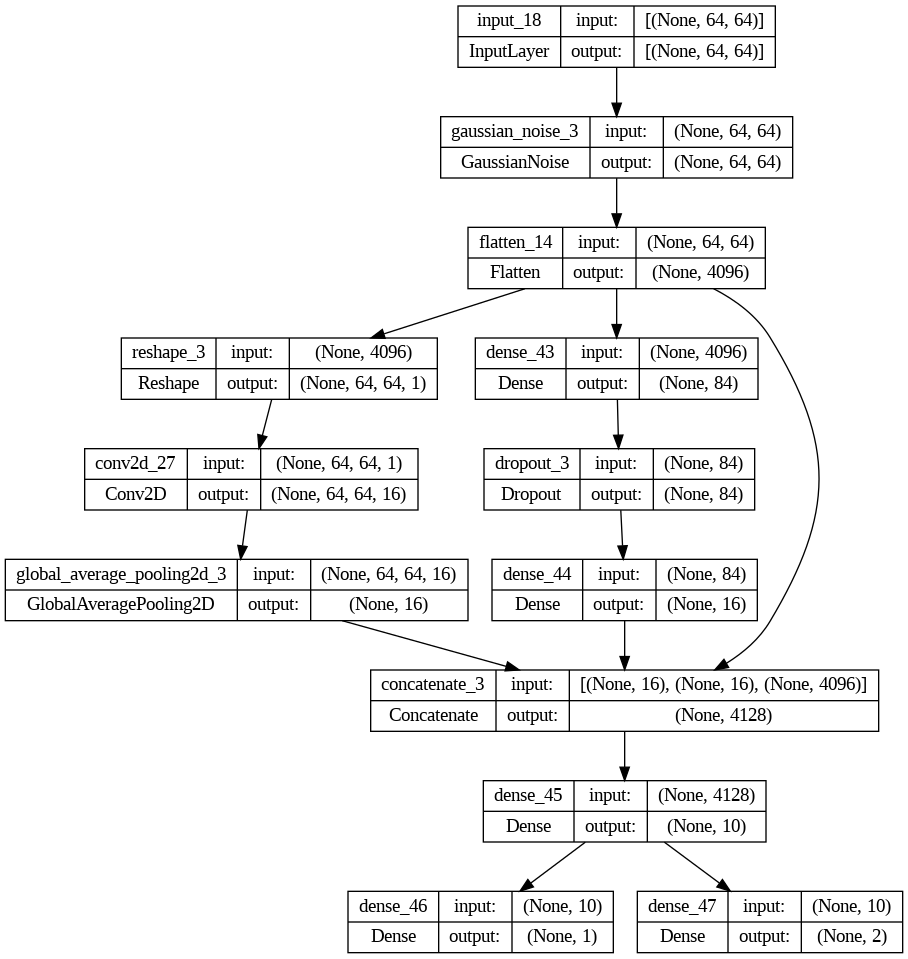

In [35]:
output_tensor = input_tensor = Input(shape=(64,64))
output_tensor = GaussianNoise(0.1)(output_tensor)
output_tensor = Flatten()(output_tensor)

tensor_to_concat = []

paths = [
    [
        Reshape((64,64,1)),
        Conv2D(16,kernel_size=(1,1),activation='relu'),
        GlobalAveragePooling2D()
    ],
    [
        Dense(84,activation='relu'),
        Dropout(0.1),
        Dense(16)
    ]
]

for path in paths:
  temp_tensor = output_tensor
  for layer in path:
    temp_tensor = layer(temp_tensor)
  tensor_to_concat.append(temp_tensor)

tensor_to_concat.append(output_tensor)
output_tensor = concatenate(tensor_to_concat)

output_tensor = Dense(10,activation='softmax')(output_tensor)

output_tensors = [(Dense(1,activation='softmax')(output_tensor)),(Dense(2,activation='softmax')(output_tensor))]

model = Model(input_tensor,output_tensors)
model.compile()
plot_model(model,show_shapes=True)


In [48]:
def build(filter_num,pool_size):
  model = Sequential()
  model.add(Input(shape=X_train.shape[1:]))
  model.add(Conv2D(filter_num,kernel_size=(3,3),padding="same",activation='selu'))
  model.add(MaxPooling2D(pool_size))
  model.add(Conv2D(filter_num*2,kernel_size=(3,3),padding="same",activation='selu'))
  model.add(MaxPooling2D(pool_size))
  model.add(Flatten())
  model.add(Dense(class_num,activation='softmax'))
  model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics='accuracy')
  return model

params = {
    "filter_num": [6,10],
    "pool_size": [(2,2),(5,5)]
}

classifier = KerasClassifier(build)
grid = GridSearchCV(classifier,params)
grid.fit(X_train,y_train,epochs=5)

print(grid.best_params_)

Epoch 1/5


<ipython-input-48-c997aaddd85a>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build)


1500/1500 [==============================] - 8s 5ms/step - loss: 1.3255 - accuracy: 0.8841
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1576 - accuracy: 0.9564
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1048 - accuracy: 0.9696
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0811 - accuracy: 0.9750
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.1041 - accuracy: 0.9708
Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0583 - accuracy: 0.8789
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1339 - accuracy: 0.9622
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0893 - accuracy: 0.9735
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0740 - accuracy: 0.9772
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0736 - accuracy: 0.9795
E